# PROV-O Diagram Rendering Example - RRAP

This example takes a PROV-O activity graph and uses the [PROV Python library](https://pypi.python.org/pypi/prov), which is an implementation of the [Provenance Data Model](http://www.w3.org/TR/prov-dm/) by the World Wide Web Consortium, to create a graphical representations like PNG, SVG, PDF.

## Read a simple provenance document

We will use an example from the RRAP MDS Project ... and use the prov library to deserialize the rrap example prov document

In [1]:
from prov.model import ProvDocument
import prov.model as pm
import json
import pprint

filename = "rrap2.json"
basename = "prov-ex1"

with open(filename) as f:
    content = f.read()
    # Create a new provenance document
    d1 = pm.ProvDocument.deserialize(content=content, format='json')

In [6]:
print(d1.get_provn())

document
  prefix rrap <https://rrap-is.com>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  
  wasGeneratedBy(rrap:output1, rrap:counterfactualA, -)
  wasGeneratedBy(rrap:output2, rrap:counterfactualB, -)
  wasAssociatedWith(rrap:counterfactualA, rrap:csiro, -)
  wasAssociatedWith(rrap:counterfactualA, rrap:peter, -)
  wasAssociatedWith(rrap:counterfactualB, rrap:csiro, -)
  wasAssociatedWith(rrap:counterfactualB, rrap:peter, -)
  used(rrap:counterfactualA, rrap:coconet, -)
  used(rrap:counterfactualA, rrap:COTS5.1, -)
  used(rrap:counterfactualA, rrap:input_param_file, -)
  used(rrap:counterfactualA, rrap:input_config_file, -)
  used(rrap:counterfactualA, rrap:input1, -)
  used(rrap:counterfactualB, rrap:coconet, -)
  used(rrap:counterfactualB, rrap:output1, -)
  used(rrap:counterfactualB, rrap:COTS5.2, -)
  used(rrap:counterfactualB, rrap:input_param_file2, -)
  used(rrap:counterfactualB, rrap:input_config_file2, -)
  wasAttributedTo(rrap:output1, rrap:peter)
  wasAttributedTo(rrap:out

In [9]:
print(d1.serialize(indent=2, format='rdf', rdf_format='ttl'))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rrap: <https://rrap-is.com> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

rrap:output2 a prov:Entity ;
    prov:wasAttributedTo rrap:peter ;
    prov:wasGeneratedBy rrap:counterfactualB ;
    rrap:handle_id "outputfakehandle2"^^xsd:string ;
    rrap:version "1.2.4"^^xsd:string .

rrap:COTS5.1 a prov:Entity .

rrap:COTS5.2 a prov:Entity .

rrap:counterfactualA a prov:Activity ;
    prov:endedAtTime "2022-06-16T15:24:02.809248"^^xsd:dateTime ;
    prov:startedAtTime "2022-06-16T14:54:02.809239"^^xsd:dateTime ;
    prov:used rrap:COTS5.1,
        rrap:coconet,
        rrap:input1,
        rrap:input_config_file,
        rrap:input_param_file ;
    prov:wasAssociatedWith rrap:csiro,
        rrap:peter .

rrap:counterfactualB a prov:Activity ;
    prov:endedAtTime "2022-06-16T15:24:03.355536"^^xsd:dateTime ;
    prov:startedAtTime "2022-06-16T14:54:03.355530"^^xsd:dateTime ;
    prov:us

## Graphics export (PNG and PDF)

In addition to the PROV-N output (as above), the document can be exported into a graphical representation with the help of the [GraphViz](http://www.graphviz.org/). It is provided as a software package in popular Linux distributions, or can be [downloaded](http://www.graphviz.org/Download.php) for Windows and Mac.

Once you have GraphViz installed and the `dot` command available in your operating system's paths, you can save the document we have so far into a PNG file as follows.

In [3]:
from prov.dot import prov_to_dot
d = prov_to_dot(d1)

In [4]:
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

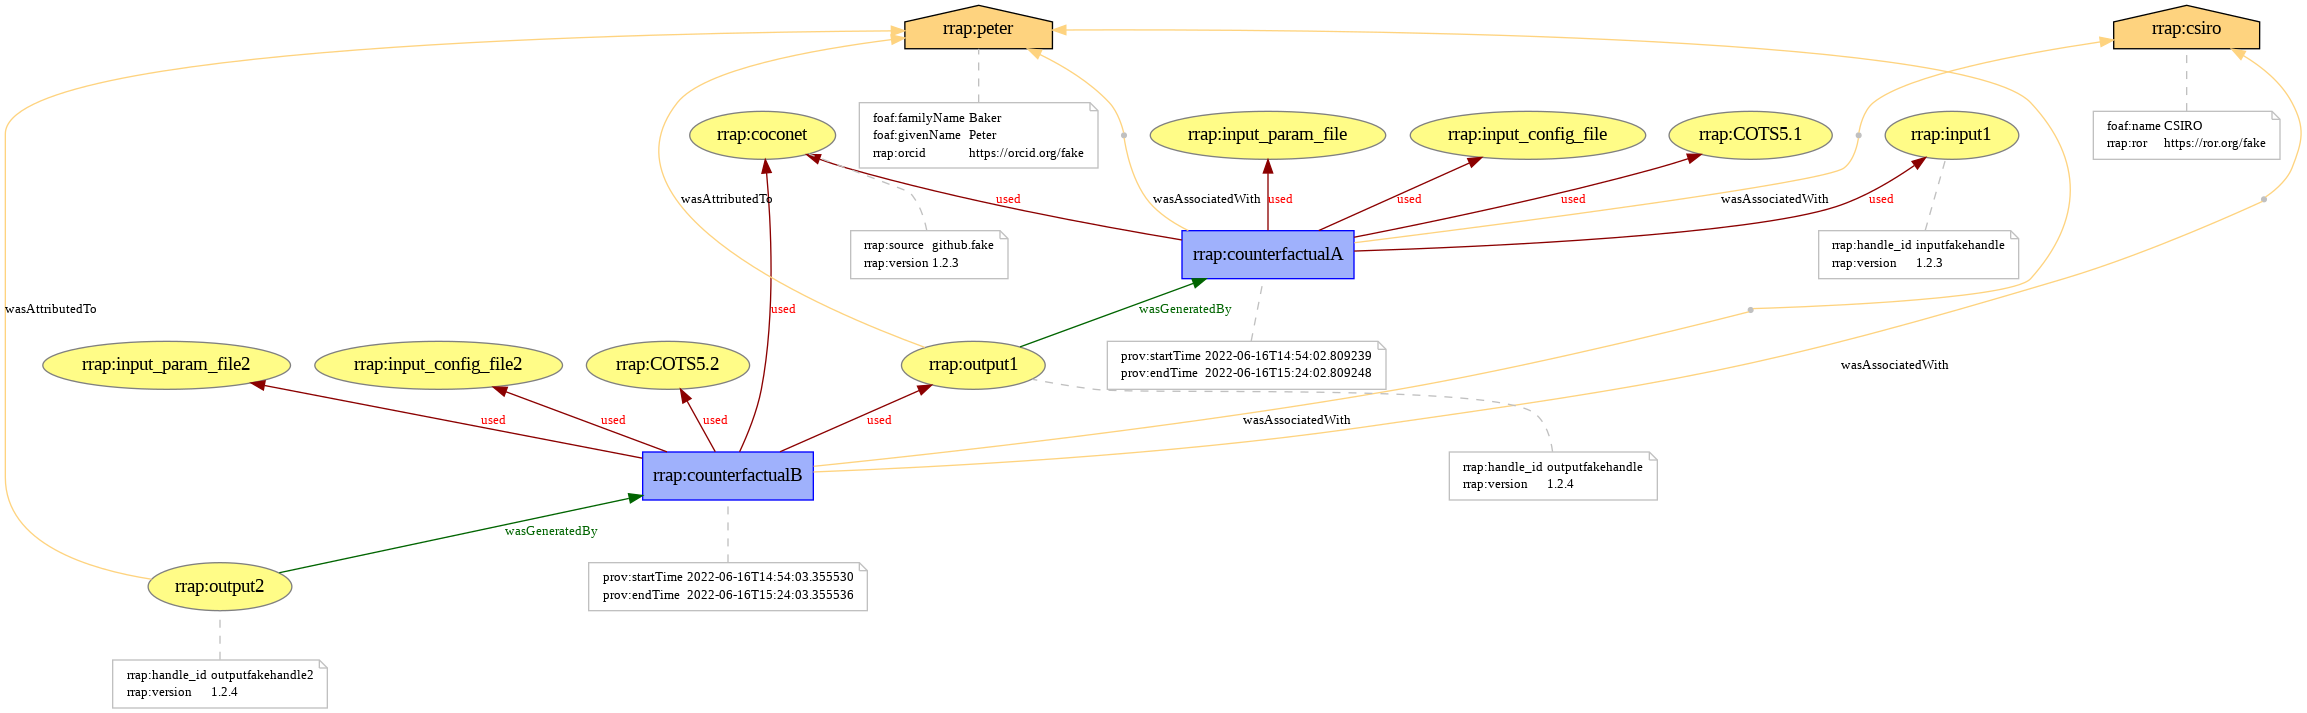

In [5]:
view_pydot(d)